# Plot of feed activity

This is the main (& only!) plot.


## Imports


In [12]:
LATEX_AVAILABLE = True

In [1]:
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
DATA_DIR = Path("/home/emily/bluesky/_backups/251008_parquet")

for file in DATA_DIR.glob("*.parquet"):
    print(file.name)

post.parquet
modactions.parquet
botactions.parquet
activitylog.parquet
account.parquet


In [3]:
def add_datetime_cols(table, *columns):
    """Converts things to datetime and fixes that trailing zeros aren't included by
    postgres because its a little shit.
    """
    to_add = {
        col + "_dt": pl.col(col).str.replace(r"\..*", "").str.to_datetime(strict=False)
        for col in columns
    }
    return table.with_columns(**to_add)


posts = add_datetime_cols(pl.read_parquet(DATA_DIR / "post.parquet"), "indexed_at")
account = add_datetime_cols(pl.read_parquet(DATA_DIR / "account.parquet"), "indexed_at")
activitylog = (
    add_datetime_cols(pl.read_parquet(DATA_DIR / "activitylog.parquet"), "request_dt")
    .drop("request_dt")
    .with_columns(request_dt=pl.col("request_dt_dt"))
    .drop("request_dt_dt")
)

## Matplotlib defaults


In [47]:
# Paths
FIGS = Path("../paper")

# Constants (in inches, for matplotlib's sake)
# Defined for ADASS style
TEXTWIDTH = 5.25

# Colorblind friendly color cycles from Petroff+21
cycle6 = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]
cycle8 = [
    "#1845fb",
    "#ff5e02",
    "#c91f16",
    "#c849a9",
    "#adad7d",
    "#86c8dd",
    "#578dff",
    "#656364",
]
cycle10 = [
    "#3f90da",
    "#ffa90e",
    "#bd1f01",
    "#94a4a2",
    "#832db6",
    "#a96b59",
    "#e76300",
    "#b9ac70",
    "#717581",
    "#92dadd",
]

if LATEX_AVAILABLE:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"\usepackage{amsmath}")
plt.rc("font", family="serif", size=10)
plt.rc("legend", edgecolor="k", framealpha=1.0, fontsize=7)
plt.rc("figure", dpi=150, figsize=(COLWIDTH, 3.0), facecolor="w")
plt.rc(
    "savefig", dpi=300, bbox="tight", format="pdf", facecolor="w", transparent=False
)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

# Optional extras if you have no log plots, avoiding ax.minorticks_on():
plt.rc("xtick.minor", visible=True)
plt.rc("ytick.minor", visible=True)

In [25]:
posts

id,uri,cid,author,text,feed_all,feed_astro,indexed_at,feed_exoplanets,feed_astrophotos,feed_cosmology,feed_extragalactic,feed_highenergy,feed_instrumentation,feed_methods,feed_milkyway,feed_planetary,feed_radio,feed_stellar,feed_education,feed_history,hidden,likes,feed_research,feed_solar,feed_questions,indexed_at_dt
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,datetime[μs]
1,"""at://did:plc:jcoy7v3a2t4rcfdh6…","""zdpuB1RkRdSCrBcGtgVfNUzkSt6rfY…","""did:plc:jcoy7v3a2t4rcfdh6i4kza…",null,"""t""","""f""","""2023-07-07 22:02:31""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""0""","""f""","""f""","""f""",2023-07-07 22:02:31
2,"""at://did:plc:tklhfvwzb5euaz2qe…","""zdpuB2bTiJdsKx7D6vhV6bZzZPYDtm…","""did:plc:tklhfvwzb5euaz2qeyfcic…",null,"""t""","""f""","""2023-07-07 22:14:07""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""0""","""f""","""f""","""f""",2023-07-07 22:14:07
3,"""at://did:plc:xdz63lhdf4l3xbrwc…","""zdpuAo4W1MGQHWzvhcvv6GfP9NJKbH…","""did:plc:xdz63lhdf4l3xbrwceld6l…",null,"""t""","""f""","""2023-07-07 22:29:04""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""0""","""f""","""f""","""f""",2023-07-07 22:29:04
4,"""at://did:plc:xdz63lhdf4l3xbrwc…","""zdpuB2rvsWLnvg8Y9P2Nseg3d7LpaS…","""did:plc:xdz63lhdf4l3xbrwceld6l…",null,"""t""","""f""","""2023-07-07 22:30:10""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""0""","""f""","""f""","""f""",2023-07-07 22:30:10
5,"""at://did:plc:xdz63lhdf4l3xbrwc…","""zdpuAtpVG65BfPn25v9BsRdRg5rc1T…","""did:plc:xdz63lhdf4l3xbrwceld6l…",null,"""t""","""f""","""2023-07-07 22:42:46""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""0""","""f""","""f""","""f""",2023-07-07 22:42:46
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1396898,"""at://did:plc:vyftd7vjsufihcvdp…","""bafyreiehfqszjogqbj45hqvxmea7a…","""did:plc:vyftd7vjsufihcvdpbgqcu…","""está downlodeado""","""t""","""f""","""2025-10-08 07:16:57.202591""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""0""","""f""","""f""","""f""",2025-10-08 07:16:57
1396908,"""at://did:plc:67bgg4j34njbopitm…","""bafyreierarabkmh3etwsxdkwhqopa…","""did:plc:67bgg4j34njbopitm62cvd…","""Gurdon had the answer. Pausing…","""t""","""f""","""2025-10-08 07:22:28.40166""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""0""","""f""","""f""","""f""",2025-10-08 07:22:28
1396910,"""at://did:plc:puwq7yey5vayc6y44…","""bafyreieq6tbvwod7s5sexzuzhmkr5…","""did:plc:puwq7yey5vayc6y44cgerr…","""I think this is grossly undere…","""t""","""f""","""2025-10-08 07:26:49.096693""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""f""","""0""","""f""","""f""","""f""",2025-10-08 07:26:49


In [26]:
# the polars query language is beautiful!
posts_by_week = (
    posts.filter(pl.col("feed_astro") == "t")
    .group_by(pl.col("indexed_at_dt").dt.strftime("%Y-%W").alias("yearweek"))
    .agg(
        pl.col("feed_astro").str.contains("t").sum(),
        pl.col("feed_research").str.contains("t").sum(),
        pl.col("feed_astrophotos").str.contains("t").sum(),
        pl.col("indexed_at_dt").first().dt.truncate("1w").alias("week_start"),
        pl.col("author").unique().count().alias("authors")
    )
    .sort("yearweek")
)[:-1]
posts_by_week

yearweek,feed_astro,feed_research,feed_astrophotos,week_start,authors
str,u32,u32,u32,datetime[μs],u32
"""2023-27""",12,0,0,2023-07-03 00:00:00,6
"""2023-28""",256,0,0,2023-07-10 00:00:00,69
"""2023-29""",137,0,0,2023-07-17 00:00:00,48
"""2023-30""",187,0,0,2023-07-24 00:00:00,57
"""2023-31""",143,0,0,2023-07-31 00:00:00,52
…,…,…,…,…,…
"""2025-35""",765,118,223,2025-09-01 00:00:00,247
"""2025-36""",757,123,180,2025-09-08 00:00:00,231
"""2025-37""",737,108,185,2025-09-15 00:00:00,241


In [6]:
# the polars query language is beautiful!
signups_by_week = (
    account.filter(pl.col("is_valid") == "t")
    .group_by(pl.col("indexed_at_dt").dt.strftime("%Y-%W").alias("yearweek"))
    .agg(
        pl.col("did").count().alias("count"),
        pl.col("indexed_at_dt").first().dt.truncate("1w").alias("week_start"),
    )
    .sort("yearweek")
    .with_columns(total=pl.col("count").cum_sum())
)
signups_by_week

yearweek,count,week_start,total
str,u32,datetime[μs],u32
"""2023-27""",90,2023-07-03 00:00:00,90
"""2023-28""",32,2023-07-10 00:00:00,122
"""2023-29""",9,2023-07-17 00:00:00,131
"""2023-30""",17,2023-07-24 00:00:00,148
"""2023-31""",13,2023-07-31 00:00:00,161
…,…,…,…
"""2025-35""",4,2025-09-01 00:00:00,1738
"""2025-36""",9,2025-09-08 00:00:00,1747
"""2025-37""",5,2025-09-15 00:00:00,1752


In [7]:
activitylog

id,request_feed_uri,request_limit,request_is_scrolled,request_user_did,request_dt
i64,str,i64,str,str,datetime[μs]
1,"""astro""",100,"""f""","""did:plc:xclzms2fgo54uzfvo3dnoj…",2025-03-11 20:17:00
2,"""astro""",30,"""f""","""did:plc:qr3oslvhsdnqr6shqoyw6p…",2025-03-11 20:17:00
3,"""astro""",10,"""f""","""did:plc:jppjbeiedzxbgfqib774ml…",2025-03-11 20:17:00
4,"""astro""",1,"""f""","""did:plc:xhdmhfnfww7sdr2vdqf3gt…",2025-03-11 20:17:00
5,"""astro""",30,"""f""","""did:plc:4obmmbkjovlw2i4s7q3pn4…",2025-03-11 20:17:00
…,…,…,…,…,…
24196651,"""astrophotos""",10,"""f""","""did:plc:vqhc7u6ingqhsslzs6j7fs…",2025-10-08 07:42:19
24196652,"""astrophotos""",10,"""f""","""did:plc:vqhc7u6ingqhsslzs6j7fs…",2025-10-08 07:42:19
24196653,"""astro""",30,"""t""","""did:plc:e4v7mbwwkrasictfcptefd…",2025-10-08 07:42:20


In [8]:
# the polars query language is beautiful!
views_by_week = (
    activitylog.group_by(pl.col("request_dt").dt.strftime("%Y-%W").alias("yearweek"))
    .agg(
        pl.col("id").count().alias("views"),
        pl.col("request_is_scrolled").str.contains("t").sum().alias("scrolls"),
        pl.col("request_dt").first().dt.truncate("1w").alias("week_start"),
        pl.col("request_user_did").unique().count().alias("unique_viewers"),
        pl.col("request_user_did")
        .filter(pl.col("request_is_scrolled").str.contains("t"))
        .unique()
        .count()
        .alias("unique_scrollers"),
    )
    .sort("yearweek")
)[
    # activitylog.filter(pl.col("is_valid") == "t")
    1:-1
]
views_by_week

yearweek,views,scrolls,week_start,unique_viewers,unique_scrollers
str,u32,u32,datetime[μs],u32,u32
"""2025-11""",803758,114280,2025-03-17 00:00:00,46339,26643
"""2025-12""",786691,118353,2025-03-24 00:00:00,44857,26433
"""2025-13""",837299,151446,2025-03-31 00:00:00,45523,30119
"""2025-14""",874758,127150,2025-04-07 00:00:00,96921,26449
"""2025-15""",974226,85440,2025-04-14 00:00:00,174646,21351
…,…,…,…,…,…
"""2025-35""",775130,92662,2025-09-01 00:00:00,90996,18187
"""2025-36""",834389,98346,2025-09-08 00:00:00,103116,18904
"""2025-37""",764652,58486,2025-09-15 00:00:00,95569,13815


# Plot it!

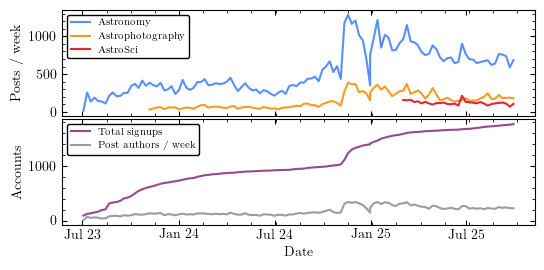

In [151]:
fig, ax = plt.subplots(
    nrows=2, layout="constrained", dpi=100, figsize=(TEXTWIDTH, 2.5), sharex=True
)

# Posts per week
ax[0].plot(
    posts_by_week["week_start"],
    posts_by_week["feed_astro"],
    color=cycle6[0],
    label="Astronomy",
)
good_posts = posts_by_week.filter(pl.col("feed_astrophotos") > 0)
ax[0].plot(
    good_posts["week_start"],
    good_posts["feed_astrophotos"],
    color=cycle6[1],
    label="Astrophotography",
)
good_posts = posts_by_week.filter(pl.col("feed_research") > 0)
ax[0].plot(
    good_posts["week_start"],
    good_posts["feed_research"],
    color=cycle6[2],
    label="AstroSci",
)


#

ax[1].plot(
    signups_by_week["week_start"],
    signups_by_week["total"],
    color=cycle6[3],
    label="Total signups",
)
ax[1].plot(
    posts_by_week["week_start"],
    posts_by_week["authors"],
    color=cycle6[4],
    label="Post authors / week",
)

for an_ax in ax:
    an_ax.legend(edgecolor="k")

# ax[1].set(yscale="log")

ax[0].set(ylabel="Posts / week")
ax[1].set(xlabel="Date", ylabel="Accounts")
# ax[1].tick_params(axis="x")

x_ticks = list(
    pl.date_range(
        pl.datetime(2023, 7, 1), pl.datetime(2026, 1, 1), interval="6mo", eager=True
    )
)[:-1]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels([d.strftime("%b %y") for d in x_ticks])

fig.get_layout_engine().set(hspace=0, wspace=0, h_pad=0, w_pad=0)

fig.savefig(FIGS / "O8-4-1.jpg", pad_inches=0.01)

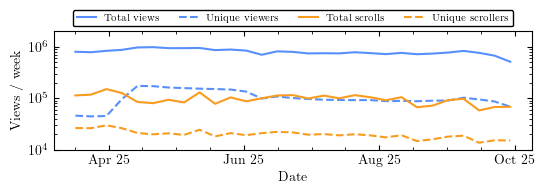

In [153]:
fig, ax = plt.subplots(
    nrows=1, layout="constrained", dpi=100, figsize=(TEXTWIDTH, 1.75), sharex=True
)

# Posts per week
ax.plot(
    views_by_week["week_start"],
    views_by_week["views"],
    color=cycle6[0],
    label="Total views",
)
ax.plot(
    views_by_week["week_start"],
    views_by_week["unique_viewers"],
    color=cycle6[0],
    label="Unique viewers",
    ls="--",
)
ax.plot(
    views_by_week["week_start"],
    views_by_week["scrolls"],
    color=cycle6[1],
    label="Total scrolls",
)
ax.plot(
    views_by_week["week_start"],
    views_by_week["unique_scrollers"],
    color=cycle6[1],
    label="Unique scrollers",
    ls="--",
)


ax.set(xlabel="Date", ylabel="Views / week")
ax.set(yscale="log", ylim=(1e4, 2e6))
x_ticks = list(
    pl.date_range(
        pl.datetime(2025, 4, 1), pl.datetime(2025, 12, 1), interval="2mo", eager=True
    )
)[:-1]
ax.set_xticks(x_ticks)
ax.set_xticklabels([d.strftime("%b %y") for d in x_ticks])

ax.legend(edgecolor="k", ncols=4, loc="lower center", bbox_to_anchor=(0.5, 1.0))

fig.get_layout_engine().set(hspace=0, wspace=0, h_pad=0, w_pad=0)

fig.savefig(FIGS / "O8-4-2.jpg", pad_inches=0.01)